# Plotting Oceanographic Station Data from Deepa Rao

In [1]:
import os #need to to move between directories while using jupyter notebook
import glob

In [2]:
# data & math
import math
from math import e
import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
import datetime as dt

# open CNV files for CTD data
from seabird.cnv import fCNV

# seawater property calculations
#import seawater as sw #seawater package: https://pypi.org/project/seawater/, examples: https://pythonhosted.org/seawater/library.html

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colormap

%matplotlib inline
import seaborn as sns
#import cmocean as cmo

# set seaborn style: http://www.jesshamrick.com/2016/04/13/reproducible-plots/
sns.set_context('paper')

# Load Data from CTD + spreadsheets

In [3]:
# load CTD files from directory
profile_1 = fCNV('CTD/BV55C1.cnv')

# read CNV files into DF
df_11 = profile_1.as_DataFrame()
df_11.head()

#import cleaned/organized data from 57Co_Full_Analysis_Data_Organization.ipynb
#c_odv = pd.read_csv('/Users/Deepa/Documents/2017_2018_Antarctica_Cruise/Antarctica_A_Research/General_CICLOPS_Data/CICLOPS_CTD_DATA/ciclops_ctd_odv.csv', header=0) #ciclops all stations CTD data
#odv_bio_pig = pd.read_csv('/Users/Deepa/Documents/2017_2018_Antarctica_Cruise/Antarctica_A_Research/57_Uptake_All/odv_bio_pig.csv', header=0) #ciclops nuts, metals, hydrographic properties, and uptakes

odv = pd.read_csv('dmetals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn1.head()


,Latitude,Longitude,Station,depth,Fe,Zn,Cd,Ni,Cu,Mn,PO4,NO2+NO3,Si,NO2,NH4
0,31.666888,-64.166293,1,10,0.535234,1.013424,0.001253,2.004302,0.854536,2.395847,0.17,0.3,0.1,0.04,0.19
1,31.666888,-64.166293,1,30,0.531819,0.671165,0.003520,1.958119,0.888045,2.544319,0.18,0.2,0.3,0.02,0.09
2,31.666888,-64.166293,1,60,0.736866,0.748252,0.003182,1.972479,0.996230,2.158336,0.18,0.1,0.1,0.03,0.15
3,31.666888,-64.166293,1,115,0.185665,0.971132,0.007250,2.003143,0.908902,1.298053,0.23,1.4,0.4,0.10,0.00
4,31.666888,-64.166293,1,150,0.237065,1.444574,0.006938,2.008332,0.928732,1.185590,0.16,1.0,0.1,0.03,0.16


NameError: name 'ax2' is not defined

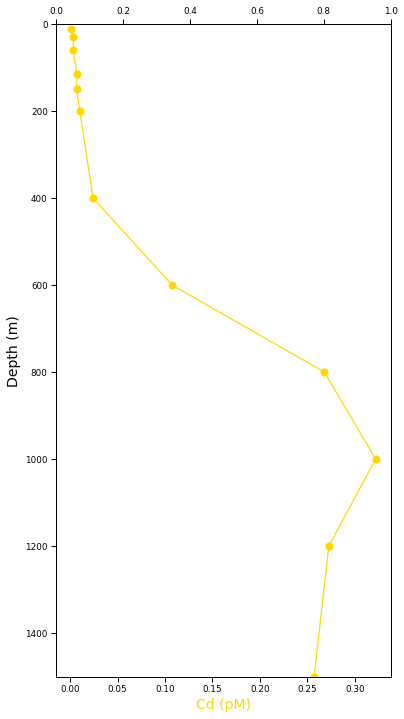

In [4]:
# *Uptake with depth, double axis
#Co uptake (pM day$^{-1}$) <-- subscript
station = stn1
font_size = 14
fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(111, label='temp')
s1, = ax1.plot( 'Cd', 'depth', 'o-', color='gold', markersize=7, label='Cd (pM)', data=station)
ax1.set_ylim([0,1500])
ax1.invert_yaxis()
ax1.set_xlabel('Cd (pM)', color='gold', fontsize=font_size)
ax1.set_ylabel('Depth (m)', fontsize=font_size)
dax1 = ax1.twiny() #define second x-axis
s2, = ax2.plot( 'Ni', 'depth', 'o-', color='seagreen', markersize=7, label='Ni (nM)', data=station)
s3, = dax1.plot('0.2_Co_Uptake_L_%', 'DEPTH [m]', 'o--', color='deepskyblue', markersize=7, label='$\% CoCl_2$ ($\geq$ 0.2 $\mu$m)', data=station)
dax1.set_ylim(dax1.get_ylim()[::-1])
dax1.set_xlim(dax1.get_xlim())
dax1.set_xlabel('Percent cobalt-57 uptake (day$^{-1}$)', color='navy', fontsize=font_size,)
dax1.yaxis.set_visible(False)
dax1.spines['top'].set_position(('outward', 45))
dax1.tick_params(axis='x', colors='black', labelsize=font_size)
dax1.xaxis.tick_top()
dax1.xaxis.set_label_position('top')
dax1.xaxis.set_ticks_position('top')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlim(ax1.get_xlim())
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')

# define plot legend
lns = [s1, s2, s3, s4]
#ax1.legend(handles=lns, loc='lowerleft')
# Put a legend below current axis
ax1.legend(handles=lns, loc='upper center', bbox_to_anchor=(0.5, -0.02), fontsize=font_size, frameon=False,
          title='Station 11', title_fontsize=font_size, ncol=2)

# show and save figure
plt.tight_layout()
#plt.savefig('/Users/Deepa/Documents/2017_2018_Antarctica_Cruise/Antarctica_A_Research/57_Uptake_All/Working_Figures/STN22_uptake_Profile.png', format='png', dpi=300, transparent=True)
plt.show()

In [ ]:
# PLOT CTD DATA, double x-axis

#figure
fig = plt.figure(figsize=(6,12))
font_size = 14
ax1 = fig.add_subplot(111) #, label='temp')
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = df_11
y = df['DEPTH'] #m
x1 = df['TEMP'] #degC
x2 = df['oxygen_ml_L'] #dO2 (ml/l)
x3 = df['flECO-AFL'] #Fluorescence ECO_AFL/FL (mg/m^3)

#data colors
x1_color = 'gray'
x2_color = 'royalblue'
x3_color = 'darkseagreen'

# plot
fig1, = ax1.plot( x1, y, '-', color=x1_color, linewidth=3, markersize=3, data=df, label='Temperature ($\degree$C)')
fig2, = ax2.plot( x2, y, '--', color=x2_color, linewidth=3, markersize=3, data=df, label='dO$_2$ (ml/L)')
fig3, = ax3.plot( x3, y, '-', color=x3_color, linewidth=3, markersize=3, data=df, label='Fluoresence (mg/m$^3$)')

#alter y axis
ax1.set_ylim([0,300])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Temperature ($\degree$C)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('$O_2$ (ml/L)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('Fluoresence (mg/m$^3$)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['top'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 50))
ax3.spines['top'].set_position(('outward', 100))

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax2.tick_params(axis='x', colors='black', labelsize=font_size)
ax3.tick_params(axis='x', colors='black', labelsize=font_size)

ax1.xaxis.set_ticks_position('top')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('top')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

# Put a legend below current axis
lns = [fig1, fig2, fig3]
ax1.legend(handles=lns, loc='lower right', fontsize=font_size-2, 
        frameon=False,title='Station 11', title_fontsize=font_size-2)
# loc='upper center', bbox_to_anchor=(0.5, -0.02),
plt.tight_layout()
#plt.savefig('/Users/Deepa/Documents/2017_2018_Antarctica_Cruise/Antarctica_A_Research/57_Uptake_All/Working_Figures/STN46_Profile.png', format='png', dpi=300, transparent=True)
plt.show()

In [2]:
# MAJOR problem saving figure, so I just took a screenshot after plotting
fig = plt.figure(figsize=(6,12))
font_size = 14
ax1 = fig.add_subplot(111) #, label='temp')
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis
ax4 = ax1.twiny()

#data
df = df_11 #ctd
dff = stn11 #station 
y = df['DEPTH'] #m
y2 = dff['DEPTH [m]']
x1 = df['flECO-AFL'] #Fluorescence ECO_AFL/FL (mg/m^3)
x2 = dff['Total Co [pM] corrected'] #(ng/L)
x3 = dff['3_B12_Uptake_L_%'] #%B12 
x4 = dff['3_Co_Uptake_L_%'] #%Co
#inset data
x5 = dff['Fuco'] #(ng/L)
x6 = dff['19-Hex'] #(ng/L)

#main data colors
x1_color = 'darkseagreen' #fluoresence
x2_color = 'royalblue' #chla
x3_color = 'mediumvioletred'#uptake
x4_color = 'cornflowerblue' #uptake
#inset data colors
x5_color = 'darkcyan' #diatom
x6_color = 'saddlebrown' #phaeo

# plot
fig1, = ax1.plot( x1, y, '-', color=x1_color, linewidth=4, alpha=0.8, markersize=7, data=df, label='Fluoresence (mg/m$^3$)')
fig2, = ax2.plot( x2, y2, 'o-', color=x2_color, linewidth=2, markersize=7, data=dff, label='Total Co (pM)')
fig3, = ax3.plot( x3, y2, 'o--', color=x3_color, linewidth=2, markersize=7, data=dff, label='% 57-$B_{12}$ uptake day$^{-1}$ (3 $\geq \mu$m)')
fig4, = ax3.plot( x4, y2, 'o--', color=x4_color, linewidth=2, markersize=7, data=dff, label='% 57-Co uptake day$^{-1}$ (3 $\geq \mu$m)')

#alter y axis
ax1.set_ylim([0,200])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Fluoresence (mg/m$^3$)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('Total Co (pM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('% 57-$B_{12}$ uptake day$^{-1}$ (3 $\geq \mu$m)', color=x3_color, fontsize=font_size)
ax4.set_xlabel('% 57-Co uptake day$^{-1}$ (3 $\geq \mu$m)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
ax4.spines['top'].set_position(('outward', 100))

ax1.tick_params(axis='both', which='major', labelsize=font_size)
ax2.tick_params(axis='x', colors='black', labelsize=font_size)
ax3.tick_params(axis='x', colors='black', labelsize=font_size)
ax4.tick_params(axis='x', colors='black', labelsize=font_size)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
ax4.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
ax4.xaxis.set_label_position('top')

#inset pigment data
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create an inset outside the axis
x0, y0, width, height = 1.1,0.1,1,0.9 #4.1, 2.5, 2, 2
axins = inset_axes(ax1, width="50%", height="50%",
                   bbox_to_anchor=(x0,y0,width,height),
                   bbox_transform=ax1.transAxes, loc=2, borderpad=0)  #ax1.figure.transFigure
axins2 = axins.twiny()
axins.tick_params(left=False, right=True, labelleft=False, labelright=True)
in1, = axins.plot( x5, y2, 'o-', color=x5_color, linewidth=2, markersize=7, data=dff, label='Fuco')
in2, = axins2.plot( x6, y2, 'o-', color=x6_color, linewidth=2, markersize=7, data=dff, label='19-Hex')
#y-axis
axins.set_ylim([0,100])
axins.invert_yaxis()
axins.set_ylabel('Depth (m)', fontsize=font_size-2)
axins.yaxis.set_label_position('right')
#x-axis
axins.set_xlabel('Fuco (ng/L)', color=x5_color, fontsize=font_size-2)
axins2.set_xlabel('19-Hex (ng/L)', color=x6_color, fontsize=font_size-2)
axins.xaxis.set_ticks_position('top')
axins.xaxis.set_label_position('top')
axins2.xaxis.set_label_position('top')
axins2.xaxis.set_ticks_position('top')
axins2.spines['top'].set_position(('outward', 40))
#
# Put a legend below current axis
inset_leg = [in1, in2]
lns = [fig1, fig2, fig3, fig4, in1, in2]
axins.legend(handles=lns, bbox_to_anchor=(0,-0.6), loc='lower left', fontsize=font_size-2, frameon= False, title='Station 46', title_fontsize=font_size-2)
axins.apply_aspect()
axins2.apply_aspect()

#ax1.legend(handles=lns, loc='lower center', bbox_to_anchor=(1.04,0), fontsize=font_size-2, frameon=False,title='Station 22', title_fontsize=font_size-2)
#bbox_to_anchor=(0.5, -0.02)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

#plt.tight_layout()
#plt.draw()
#plt.savefig('/Users/Deepa/Documents/2017_2018_Antarctica_Cruise/Antarctica_A_Research/57_Uptake_All/Working_Figures/STN46_all.jpeg', format='jpeg', dpi=300, bbox_inches = 'tight')
plt.show()

NameError: name 'plt' is not defined

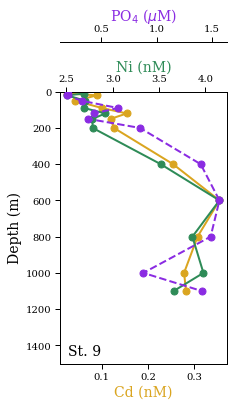

In [5]:
# dissolved Cd, Ni, PO4
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('dmetals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]
stn1.head()


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = stn9
y = df['depth'] 
x1 = df['Cd'] 
x2 = df['Ni'] 
x3 = df['PO4'] 

#main data colors
x1_color = 'goldenrod' 
x2_color = 'seagreen' 
x3_color = 'blueviolet'

# plot
fig1, = ax1.plot( x1, y, 'o-', color=x1_color, linewidth=2, markersize=7, data=df, label='Cd (nM)')
fig2, = ax2.plot( x2, y, 'o-', color=x2_color, linewidth=2, markersize=7, data=df, label='Ni (nM)')
fig3, = ax3.plot( x3, y, 'o--', color=x3_color, linewidth=2, markersize=7, data=df, label='PO$_{4}$ ($ \mu$M)')

#alter y axis
ax1.set_ylim([0,1500])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Cd (nM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('Ni (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('PO$_{4}$ ($ \mu$M)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('d_St9', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

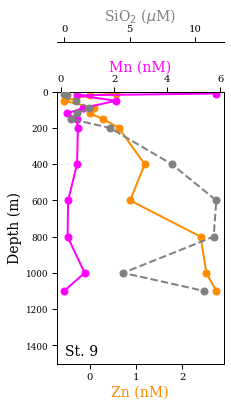

In [103]:
# dissolved Zn, Mn, Si
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('dmetals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]
stn1.head()


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = stn9
y = df['depth'] 
x1 = df['Zn'] 
x2 = df['Mn'] 
x3 = df['Si'] 

#main data colors
x1_color = 'darkorange' 
x2_color = 'fuchsia' 
x3_color = 'grey'

# plot
fig1, = ax1.plot( x1, y, 'o-', color=x1_color, linewidth=2, markersize=7, data=df, label='Zn (nM)')
fig2, = ax2.plot( x2, y, 'o-', color=x2_color, linewidth=2, markersize=7, data=df, label='Mn (nM)')
fig3, = ax3.plot( x3, y, 'o--', color=x3_color, linewidth=2, markersize=7, data=df, label='SiO$_{2}$ ($ \mu$M)')

#alter y axis
ax1.set_ylim([0,1500])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Zn (nM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('Mn (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('SiO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('d_St9_ZnSiMn', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

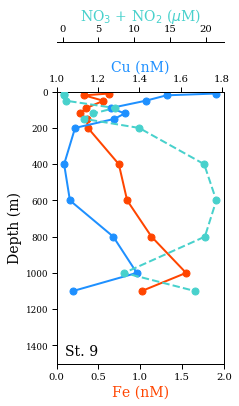

In [7]:
# dissolved Fe, Cu, NO3
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('dmetals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]
stn1.head()


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = stn9
y = df['depth'] 
x1 = df['Fe'] 
x2 = df['Cu'] 
x3 = df['NO2+NO3'] 

#main data colors
x1_color = 'orangered' 
x2_color = 'dodgerblue' 
x3_color = 'mediumturquoise'

# plot
fig1, = ax1.plot( x1, y, 'o-', color=x1_color, linewidth=2, markersize=7, data=df, label='Fe (nM)')
fig2, = ax2.plot( x2, y, 'o-', color=x2_color, linewidth=2, markersize=7, data=df, label='Cu (nM)')
fig3, = ax3.plot( x3, y, 'o--', color=x3_color, linewidth=2, markersize=7, data=df, label='NO$_{3}$ + NO$_{2}$ ($ \mu$M)')

#alter y axis
ax1.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,2])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Fe (nM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('Cu (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('NO$_{3}$ + NO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('d_St9_FeCuNO3', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

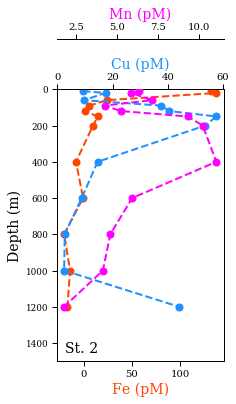

In [110]:
# particulate Fe, Cu, Mn
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('pmetals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]
stn1.head()


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = stn2
y = df['depth'] 
x1 = df['Fe'] 
x2 = df['Cu'] 
x3 = df['Mn']

#main data colors
x1_color = 'orangered' 
x2_color = 'dodgerblue' 
x3_color = 'fuchsia'

# plot
fig1, = ax1.plot( x1, y, 'o--', color=x1_color, linewidth=2, markersize=7, data=df, label='Fe (pM)')
fig2, = ax2.plot( x2, y, 'o--', color=x2_color, linewidth=2, markersize=7, data=df, label='Cu (pM)')
fig3, = ax3.plot( x3, y, 'o--', color=x3_color, linewidth=2, markersize=7, data=df, label='Mn (pM)')

#alter y axis
ax1.set_ylim([0,1500])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Fe (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('Cu (pM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('Mn (pM)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

ax1.text(0.05, 0.02, 'St. 2',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('p_St2_FeCu.jpg', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

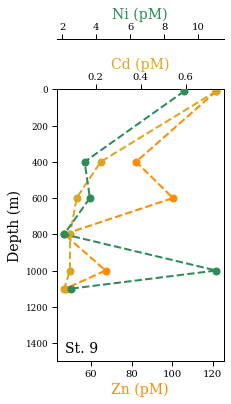

In [114]:
# particulate Ni Cd Zn
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('pmetals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]
stn1.head()


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = stn9
y = df['depth'] 
x1 = df['Zn'] 
x2 = df['Cd'] 
x3 = df['Ni']

#main data colors
x1_color = 'darkorange' 
x2_color = 'goldenrod' 
x3_color = 'seagreen'

# plot
fig1, = ax1.plot( x1, y, 'o--', color=x1_color, linewidth=2, markersize=7, data=df, label='Zn (pM)')
fig2, = ax2.plot( x2, y, 'o--', color=x2_color, linewidth=2, markersize=7, data=df, label='Cd (pM)')
fig3, = ax3.plot( x3, y, 'o--', color=x3_color, linewidth=2, markersize=7, data=df, label='Ni (pM)')

#alter y axis
ax1.set_ylim([0,1500])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('Zn (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('Cd (pM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('Ni (pM)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('p_St9_ZnCdNi.jpg', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

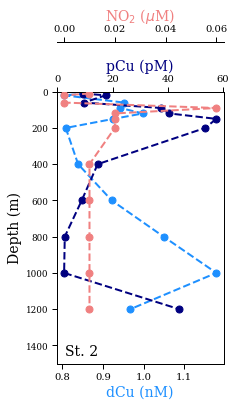

In [119]:
# particulate Cu NO2
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('Cu.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]
stn1.head()


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define third x-axis

#data
df = stn2
y = df['depth'] 
x1 = df['Cu'] 
x2 = df['pCu'] 
x3 = df['NO2']

#main data colors
x1_color = 'dodgerblue' 
x2_color = 'navy' 
x3_color = 'lightcoral'

# plot
fig1, = ax1.plot( x1, y, 'o--', color=x1_color, linewidth=2, markersize=7, data=df, label='dCu (nM)')
fig2, = ax2.plot( x2, y, 'o--', color=x2_color, linewidth=2, markersize=7, data=df, label='pCd (pM)')
fig3, = ax3.plot( x3, y, 'o--', color=x3_color, linewidth=2, markersize=7, data=df, label='NO$_{2}$ ($ \mu$M)')

#alter y axis
ax1.set_ylim([0,1500])
ax1.invert_yaxis()

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('dCu (nM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('pCu (pM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('NO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')

ax1.text(0.05, 0.02, 'St. 2',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St2_CuNO2.jpg', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

NameError: name 'ctd_st9' is not defined

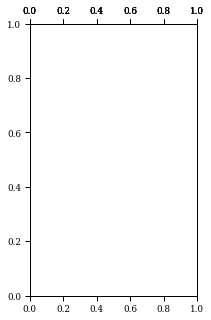

In [9]:
# dissolved Fe, particulate Fe, O2 and CHL
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
ax4 = ax1.twiny() #define second x-axis

#data
df = stn1
ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
y2 = ctd['PRES']
x1 = df['pFe'] 
x2 = df['Fe'] 
x3 = ctd['sbeox0Mm/L'] 
x4 = ctd['flC']

#main data colors
x1_color = 'coral' 
x2_color = 'brown' 
x3_color = 'midnightblue'
x4_color = 'darkturquoise'

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=1, markersize=4, data=df, label='pFe (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=1, markersize=4, data=df, label='dFe (nM)')
fig3, = ax3.plot( x3, y2, 'o--', color=x3_color, linewidth=1, markersize=0, data=ctd, label='O$_{2}$ ($ \mu$M)')
fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Fluorescence ($ \mu$g/L)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,500])
ax2.set_xlim([0,2])
ax3.set_xlim([0,300])
ax4.set_xlim([0,3])

#ax1.set_xlim([0,600])
#ax2.set_xlim([0,5])
#ax3.set_xlim([0,300])
#ax4.set_xlim([0,8])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pFe (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dFe (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('O$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
ax4.set_xlabel('Fluorescence ($ \mu$g/L)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)
ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_FeO2Chl', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

In [3]:
# load CTD files from directory
ctd_st1 = fCNV('CTD/BV55C2.cnv')
ctd_st2 = fCNV('CTD/BV55C5.cnv')
ctd_st3 = fCNV('CTD/BV55C7.cnv')
ctd_st5 = fCNV('CTD/BV55C9.cnv')
ctd_st6 = fCNV('CTD/BV55C11.cnv')
ctd_st7 = fCNV('CTD/BV55C16.cnv')
ctd_st8 = fCNV('CTD/BV55C17.cnv')


# read CNV files into DF
ctd_st1 = ctd_st1.as_DataFrame()
ctd_st2 = ctd_st2.as_DataFrame()
ctd_st3 = ctd_st3.as_DataFrame()
ctd_st5 = ctd_st5.as_DataFrame()
ctd_st6 = ctd_st6.as_DataFrame()
ctd_st7 = ctd_st7.as_DataFrame()
ctd_st8 = ctd_st8.as_DataFrame()

In [5]:
# read CNV files into DF
ctd_st7.head()


,c1mS/cm,TEMP,PRES,par,sbeox0Mm/L,flC,CStarTr0,flag,LATITUDE,LONGITUDE
0,58.023980,27.8816,14.602,1.000000e-12,130.771,0.0365,98.9538,0.0,37.5245,-70.480167
1,58.023980,27.8822,14.602,1.000000e-12,130.769,0.0362,98.9538,0.0,37.5245,-70.480167
2,58.024836,27.8823,14.644,1.000000e-12,130.770,0.0359,98.9538,0.0,37.5245,-70.480167
3,58.024115,27.8823,14.626,1.000000e-12,130.769,0.0355,98.9538,0.0,37.5245,-70.480167
4,58.023980,27.8828,14.602,1.000000e-12,130.768,0.0352,98.9538,0.0,37.5245,-70.480167


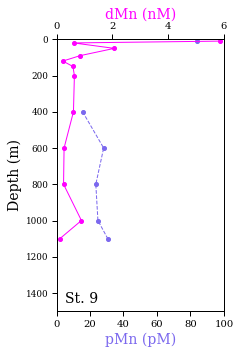

In [43]:
# dissolved Mn, particulate Mn, temp and O2
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
y2 = ctd['PRES']
x1 = df['pMn'] 
x2 = df['Mn'] 
x3 = ctd['sbeox0Mm/L'] 
x4 = ctd['TEMP']

#main data colors
x1_color = 'mediumslateblue' 
x2_color = 'magenta' 
x3_color = 'midnightblue'
x4_color = 'limegreen'

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=1, markersize=4, data=df, label='pMn (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=1, markersize=4, data=df, label='dMn (nM)')
fig3, = ax3.plot( x3, y2, 'o--', color=x3_color, linewidth=1, markersize=0, data=ctd, label='O$_{2}$ ($ \mu$M)')
fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,100])
ax2.set_xlim([0,6])
ax3.set_xlim([0,300])
ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pMn (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dMn (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('O$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)
ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_MnO2Temp', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

In [16]:
stn1.head()

,Latitude,Longitude,Station,depth,Fe,Zn,Cd,Ni,Cu,Mn,...,NO2+NO3,Si,NO2,NH4,pMn,pFe,pNi,pCu,pZn,pCd
0,31.666888,-64.166293,1,10,0.535234,1.013424,0.001253,2.004302,0.854536,2.395846688,...,0.3,0.1,0.04,0.19,NaN,NaN,NaN,NaN,NaN,NaN
1,31.666888,-64.166293,1,30,0.531819,0.671165,0.003520,1.958119,0.888045,2.54431864,...,0.2,0.3,0.02,0.09,NaN,NaN,NaN,NaN,NaN,NaN
2,31.666888,-64.166293,1,60,0.736866,0.748252,0.003182,1.972479,0.996230,2.158336011,...,0.1,0.1,0.03,0.15,NaN,NaN,NaN,NaN,NaN,NaN
3,31.666888,-64.166293,1,115,0.185665,0.971132,0.007250,2.003143,0.908902,1.298052565,...,1.4,0.4,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,31.666888,-64.166293,1,150,0.237065,1.444574,0.006938,2.008332,0.928732,1.185589776,...,1.0,0.1,0.03,0.16,NaN,NaN,NaN,NaN,NaN,NaN


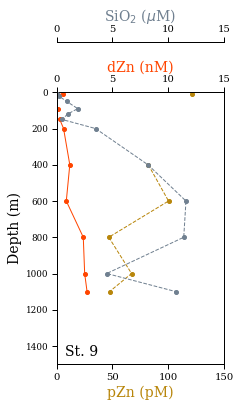

In [56]:
# dissolved Zn, particulate Zn, Si
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pZn'] 
x2 = df['Zn'] 
x3 = df['Si'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'darkgoldenrod' 
x2_color = 'orangered' 
x3_color = 'slategrey'
#x4_color = 'limegreen'

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=1, markersize=4, data=df, label='pZn (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=1, markersize=4, data=df, label='dZn (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=1, markersize=4, data=df, label='SiO$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,150])
ax2.set_xlim([0,15])
ax3.set_xlim([0,15])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pZn (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dZn (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('SiO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_ZnSi', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

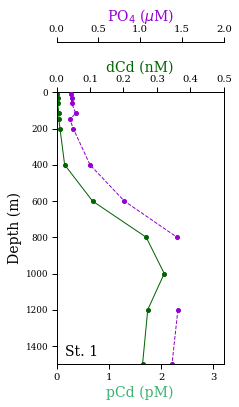

In [6]:
# dissolved Cd, particulate Cd, P
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn1
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pCd'] 
x2 = df['Cd'] 
x3 = df['PO4'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'mediumseagreen' 
x2_color = 'darkgreen' 
x3_color = 'darkviolet'
#x4_color = 'limegreen'

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=1, markersize=4, data=df, label='pCd (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=1, markersize=4, data=df, label='dCd (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=1, markersize=4, data=df, label='PO$_{4}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,3.2])
ax2.set_xlim([0,0.5])
ax3.set_xlim([0,2])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pCd (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dCd (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('PO$_{4}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 1',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St1_CdP', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

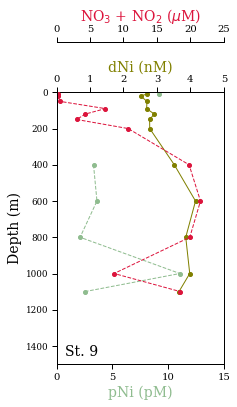

In [75]:
# dissolved Ni, particulate Ni, NO3
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn9
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pNi'] 
x2 = df['Ni'] 
x3 = df['NO2+NO3'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'darkseagreen' 
x2_color = 'olive' 
x3_color = 'crimson'
#x4_color = 'limegreen'

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=1, markersize=4, data=df, label='pNi (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=1, markersize=4, data=df, label='dNi (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=1, markersize=4, data=df, label='NO$_{3}$ + NO$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,15])
ax2.set_xlim([0,5])
ax3.set_xlim([0,25])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pNi (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dNi (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('NO$_{3}$ + NO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 9',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St9_NiNO3', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

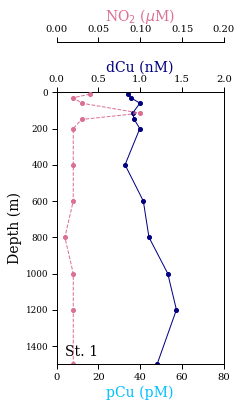

In [87]:
# dissolved Cu, particulate Cu, NO2
plt.rcParams["font.family"] = "serif"

odv = pd.read_csv('metals_ODV.csv')

#subset combined datasets for each station of interest
stn1 = odv.loc[odv['Station'] == 1]
stn2 = odv.loc[odv['Station'] == 2]
stn3 = odv.loc[odv['Station'] == 3]
stn5 = odv.loc[odv['Station'] == 5]
stn6 = odv.loc[odv['Station'] == 6]
stn7 = odv.loc[odv['Station'] == 7]
stn8 = odv.loc[odv['Station'] == 8]
stn9 = odv.loc[odv['Station'] == 9]


fig = plt.figure(figsize=(3,5))
font_size = 14
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() #define second x-axis
ax3 = ax1.twiny() #define second x-axis
#ax4 = ax1.twiny() #define second x-axis

#data
df = stn1
#ctd = ctd_st9 #St. 9 has no CTD

y1 = df['depth'] 
#y2 = ctd['PRES']
x1 = df['pCu'] 
x2 = df['Cu'] 
x3 = df['NO2'] 
#x4 = ctd['TEMP']

#main data colors
x1_color = 'deepskyblue' 
x2_color = 'navy' 
x3_color = 'palevioletred'
#x4_color = 'limegreen'

# plot
fig1, = ax1.plot( x1, y1, 'o--', color=x1_color, linewidth=1, markersize=4, data=df, label='pCu (pM)')
fig2, = ax2.plot( x2, y1, 'o-', color=x2_color, linewidth=1, markersize=4, data=df, label='dCu (nM)')
fig3, = ax3.plot( x3, y1, 'o--', color=x3_color, linewidth=1, markersize=4, data=df, label='NO$_{2}$ ($ \mu$M)')
#fig4, = ax4.plot( x4, y2, 'o--', color=x4_color, linewidth=1, markersize=0, data=ctd, label='Temperaure ($\degree$C)')


#alter y axis
ax1.set_ylim([0,1500])
ax2.set_ylim([0,1500])
ax3.set_ylim([0,1500])
#ax4.set_ylim([0,1500])
ax1.invert_yaxis()

#alter y axis
ax1.set_xlim([0,80])
ax2.set_xlim([0,2])
ax3.set_xlim([0,0.2])
#ax4.set_xlim([0,30])

#axes labels
ax1.set_ylabel('Depth (m)', fontsize=font_size)
ax1.set_xlabel('pCu (pM)', color=x1_color, fontsize=font_size)
ax2.set_xlabel('dCu (nM)', color=x2_color, fontsize=font_size)
ax3.set_xlabel('NO$_{2}$ ($ \mu$M)', color=x3_color, fontsize=font_size)
#ax4.set_xlabel('Temperaure ($\degree$C)', color=x4_color, fontsize=font_size)

#axis location and details
ax1.spines['bottom'].set_position(('outward', 0))
ax2.spines['top'].set_position(('outward', 0))
ax3.spines['top'].set_position(('outward', 50))
#ax4.spines['bottom'].set_position(('outward', 50))

ax1.tick_params(axis='x', colors='black', labelsize=10)
ax2.tick_params(axis='x', colors='black', labelsize=10)
ax3.tick_params(axis='x', colors='black', labelsize=10)
#ax4.tick_params(axis='x', colors='black', labelsize=10)

ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('top')
ax3.xaxis.set_ticks_position('top')
#ax4.xaxis.set_ticks_position('bottom')

ax1.xaxis.set_label_position('bottom')
ax2.xaxis.set_label_position('top')
ax3.xaxis.set_label_position('top')
#ax4.xaxis.set_label_position('bottom')

ax1.text(0.05, 0.02, 'St. 1',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax1.transAxes,
        color='black', fontsize=14)

#plt.tight_layout()
#plt.draw()
plt.savefig('St1_CuNO2', format='jpeg', dpi=300, bbox_inches = 'tight')
#plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
odv = pd.read_csv('metals_ODV.csv')
plt.rcParams["font.family"] = "serif"
odv.head()

,Latitude,Longitude,Station,depth,Fe,Zn,Cd,Ni,Cu,Mn,...,NO2+NO3,Si,NO2,NH4,pMn,pFe,pNi,pCu,pZn,pCd
0,31.666888,-64.166293,1,10,0.535234,1.013424,0.001253,2.004302,0.854536,2.395847,...,0.3,0.1,0.04,0.19,NaN,NaN,NaN,NaN,NaN,NaN
1,31.666888,-64.166293,1,30,0.531819,0.671165,0.003520,1.958119,0.888045,2.544319,...,0.2,0.3,0.02,0.09,NaN,NaN,NaN,NaN,NaN,NaN
2,31.666888,-64.166293,1,60,0.736866,0.748252,0.003182,1.972479,0.996230,2.158336,...,0.1,0.1,0.03,0.15,NaN,NaN,NaN,NaN,NaN,NaN
3,31.666888,-64.166293,1,115,0.185665,0.971132,0.007250,2.003143,0.908902,1.298053,...,1.4,0.4,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,31.666888,-64.166293,1,150,0.237065,1.444574,0.006938,2.008332,0.928732,1.185590,...,1.0,0.1,0.03,0.16,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
d = np.polyfit(odv['PO4'],odv['Cd'],1)
f = np.poly1d(d)
odv.insert(5,'Cd:P slope',f(odv['PO4']))

AttributeError: 'Line2D' object has no property 'xlabel'

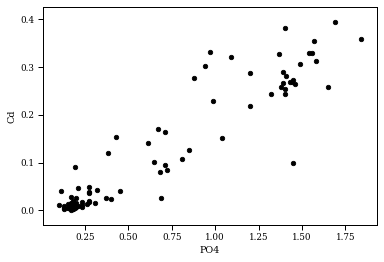

In [34]:
ax=odv.plot.scatter(x='PO4', y='Cd', color='black')
odv.plot(x='PO4',y='Cd:P slope',color='Red',legend=False,ax=ax, xlabel=('NO$_{2}$ ($ \mu$M)'))

In [18]:
odv

,Latitude,Longitude,Station,depth,Fe,Cd:P slope,Zn,Cd,Ni,Cu,...,NO2+NO3,Si,NO2,NH4,pMn,pFe,pNi,pCu,pZn,pCd
0,31.666888,-64.166293,1,10,0.535234,0.012769,1.013424,0.001253,2.004302,0.854536,...,0.3,0.1,0.04,0.19,NaN,NaN,NaN,NaN,NaN,NaN
1,31.666888,-64.166293,1,30,0.531819,0.014948,0.671165,0.003520,1.958119,0.888045,...,0.2,0.3,0.02,0.09,NaN,NaN,NaN,NaN,NaN,NaN
2,31.666888,-64.166293,1,60,0.736866,0.014948,0.748252,0.003182,1.972479,0.996230,...,0.1,0.1,0.03,0.15,NaN,NaN,NaN,NaN,NaN,NaN
3,31.666888,-64.166293,1,115,0.185665,0.025847,0.971132,0.007250,2.003143,0.908902,...,1.4,0.4,0.10,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,31.666888,-64.166293,1,150,0.237065,0.010589,1.444574,0.006938,2.008332,0.928732,...,1.0,0.1,0.03,0.16,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,39.316580,-71.123208,9,400,0.744306,0.280872,1.189901,0.254042,3.518440,1.034715,...,19.8,8.2,0.03,0.02,15.592474,141.726451,3.315211,13.920090,82.263624,0.222104
92,39.316580,-71.123208,9,600,0.843814,0.317927,0.876336,0.353989,4.151617,1.062799,...,21.5,11.6,0.03,0.05,28.158378,359.312565,3.624242,17.007435,100.375784,0.115263
93,39.316580,-71.123208,9,800,1.134641,0.300489,2.398272,0.306798,3.859904,1.273044,...,19.9,11.4,0.02,0.08,23.474225,281.682508,2.111095,9.277790,46.820124,0.086039
94,39.316580,-71.123208,9,1000,1.547895,0.167527,2.522355,0.277691,3.978938,1.387292,...,8.6,4.5,0.03,0.34,24.735252,481.442394,11.055609,10.214369,67.245080,0.085689
